# Módulo 6 Sprint

## Objetivo del proyecto (Competencias del módulo)


**Elaborar un modelo predictivo a partir de un set de datos utilizando técnicas de aprendizaje de máquina no supervisado implementados en lenguaje Python para resolver un problema.**

## Descripción del ejercicio

### Contexto

**Parte I:**

**1. La principal diferencia entre los métodos supervisados (I) y no supervisados (II) es que:**

*a) (I) requieren que el usuario especifique algunos hiperparámetros.*

*b) (II) no tienen restricciones y/o supuestos.*

*c) (I) usan la variable respuesta para entrenar el modelo.*

*d) (II) se aplican a problemas autónomos.*

- La principal diferencia entre los métodos supervisados y no supervisados es que los métodos supervisados usan la variable target para entrenar el modelo.  La respuesta correcta es C.

**2. Considere las siguientes afirmaciones:**

*(i) PCA es un método no supervisado.*

*(ii) Todos los componentes principales de un PCA son ortogonales entre si.*

*(iii) PCA busca las direcciones en las que los datos tienen la mayor varianza.*

*(iv) El número máximo de componentes principales es menor o igual al número de variables.*

*Elija la opción con el mayor número de ítems correctos:*

*a) (i) e (iii).*

*b) (ii) e (iii).*

*c) (i), (ii) e (iii).*

*d) (i), (ii), (iii) e (iv).*

- Todas las afirmaciones son correctas así que la respuesta correcta es la respuesta d)

**3. Como parte de un análisis de datos se analizaron 11 indicadores económicos y sociales de 96 países. Las variables observadas son:**

X1: Tasa anual de crecimiento de la población,

X2: Tasa de mortalidad infantil por cada 1000 nacidos vivos,

X3: Porcentaje de mujeres en la población activa,

X4: PNB en 2005 (en millones de dólares),

X5: Producción de electricidad (en millones kW/h),

X6: Líneas telefónicas por cada 1000 habitantes,

X7: Consumo de agua per capita, 

X8: Proporción de la superficie del país cubierta por bosques,

X9: Proporción de deforestación anual,

X10: Consumo de energía per cápita,

X11: Emisión de CO2 per cápita.

Dada la gran cantidad de variables se aplicó un análisis de componentes principales, utilizando la matriz de correlación, donde los vectores de carga de las dos primeras componentes son:

<img src='tablasprint6.jpg'>

A partir de la información anterior, se puede concluir que:


**a) El porcentaje de variabilidad explicado por las dos primeras componentes es 63.45%.**

- No, los datos entregados no corresponden a un porcentaje de la variabilidad, lo que se muestra son los coeficientes de cada elemento por componente principal y lo que explica es como influye cada variable en el resultado de cada componente principal.

**b) Asumiendo las condiciones necesarias sobre las componentes no reportadas, entonces es posible que las variables X2, X6, X10 y X11 son las que más contribuyen en la primera componente principal.**

- Si, se puede observar que son los valores que más influyen en la conformación de la primera componente principal

**c) Asumiendo las condiciones necesarias sobre las componentes no reportadas, entonces es posible que las variables X2, X6, X10 y X11 son las que más contribuyen en la segunda componente principal.**

- No, las variables indicadas no son las que más contribuyen al segundo componente principal.  Las variables que más peso tienen en la segunda componente principal son: X1, X3, X7, X8

**d) No es posible interpretar los resultados anteriores debido a que es un error haber utilizado la matriz de correlación y en su lugar se debería haber utilizado la matriz de covarianzas.**

- No, lo que se debió hacer para interpretar los resultados en relación al porcentaje es usar un gráfico que permita ver la influencia de PCA en la varianza explicada acumulada.

**4. Considere las siguientes observaciones:**

<img src='tabla2sprint.jpg'>

Sin escalar las variables, describa tres iteraciones del algoritmo K-means para k = 2. Use los centroides C1 = (47.5, 37.5, 21.8) y C2 = (53.2, 22.4, 75.3).

**Observación:** El objetivo del ejercicio es saber si comprenden como funcionan internamente el algoritmo, así que no basta con sólo la respuesta en Python u otro lenguaje. Aunque sí se pueden apoyar en algún software para los cálculos de cada paso.

- Comenzamos creando la matriz que se había propuesto.  Esto será necesario para poder completar el ejercicio.

- Seguimos, inicializando el algoritmo asignando el valor de los centroides a sus variables.  Se asignan dos puntos C1 y C2 que serán los centroides iniciales del estimador K-means que fue decretado con un k=2.


In [324]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

datos = np.array([[10, 4, 50],
                 [8, 99, 31],
                 [34, 44, 86],
                 [9, 50, 57],
                 [46, 77, 75],
                 [68, 30, 14],
                 [80, 25, 40],
                 [50, 35, 60]])
                  

C1 = np.array([47.5, 37.5, 21.8])
C2 = np.array([53.2, 22.4, 75.3])



- Ya que tenemos la información podemos calcular la distancia de cada punto de la tabla con el centroide más cercano, luego de obtenida la información, el algoritmo recalcula el promedio de todas las distancias de los puntos asignados y el centroide y asigna ese nuevo valor como ubicación para el centroide.

- De acuerdo a lo planteado en el enunciado, se solicita 3 iteraciones, lo que implicaría que el proceso se ejecuta 3 veces a partir de los valores entregados para los centroides C1 y C2.

- Es objetivo de este algoritmo de clasificación optimizar la distancia entre todos los puntos y el centroide más cercano motivo por el cual esto se realiza hasta que los centroides ya no se mueven (máxima optimización) luego del cálculo de la distancia.

In [325]:
for i in range(3):
    distancias_C1 = np.linalg.norm(datos - C1, axis=1)
    distancias_C2 = np.linalg.norm(datos - C2, axis=1)

    asignaciones = np.where(distancias_C1 < distancias_C2, 'C1', 'C2')


    nuevos_C1 = np.mean(datos[asignaciones == 'C1'], axis=0)
    nuevos_C2 = np.mean(datos[asignaciones == 'C2'], axis=0)

    C1 = nuevos_C1
    C2 = nuevos_C2

    print(F' ITERACIÓN Nº {i+1}')
    print(f'C1: '.ljust(20, '.') + f'{nuevos_C1}')
    print(f'C2: '.ljust(20, '.') + f'{nuevos_C2}')




 ITERACIÓN Nº 1
C1: ................[41.25 51.   35.5 ]
C2: ................[35.   40.   67.75]
 ITERACIÓN Nº 2
C1: ................[52.         51.33333333 28.33333333]
C2: ................[29.8 42.  65.6]
 ITERACIÓN Nº 3
C1: ................[52.         51.33333333 28.33333333]
C2: ................[29.8 42.  65.6]


En el caso del ejercicio anterior, luego de 2 iteraciones los centroides no varían su ubicación, motivo por el cual se entiende que alcanzo su óptimo.

**5. Enuncie al menos tres diferencias entre el análisis factorial y el método de componentes principales.**

- El *análisis factorial* es un método en el que mediante factores subyacentes buscamos interpretar una serie de variables que pudieran estar relacionadas entre sí.  Un ejemplo puede ser en las encuestas y estudios sociales donde mediante ciertas características de los encuestados donde variables como edad, estudios, profesion, domicilio, bienes propios pueden determinar un grupo socioeconómico y con eso reducir las variables con las que realizamos el análisis, también se puede citar como ejemplo las clasificaciones que se hacen en el área de análisis sicológico para poder medir aspectos latentes como personalidad, actitudes o habilidades.

- El método de *componentes principales* es un método que busca resumir la variabilidad de los datos mediante la identificación de las direcciones (componentes principales) en que los datos tienen la mayor varianza, en ese sentido no genera interpretaciones que den origen a factores subyacentes, a diferencia del *análisis factorial*, todo lo contrario busca la eliminación de cierta cantidad de data.  PCA se basa en un valor que explica la varianza por cada componente principal como argumento para la reduccion de dimensionalidad, el *análisis factorial* en cambio busca identificar relaciones subyacentes entre un grupo de variables observadas y explicar estas relaciones mediante un numero menor de factores no observados.  El *análisis factorial* por su naturaleza es más usado en las investigaciones sicométricas y ciencias sociales por la ventaja que significa el uso de factores, el PCA en cambio es un método más usado para análisis exploratorio, reduccion de dimensionalidad y reconocimiento de patrones en los datos.

**6. ¿Qué significa que el método de clusterización sea jerárquico?**

- Un método de clusterización jerárquico es aquel que organiza los datos en una estructura de árbol o dendograma, en la que los datos más parecidos se agrupan juntos en niveles superiores de la jerarquía y a medida que se baja en los niveles podemos ver mayor diferenciación de los datos.  En un esquema jerárquico, cada nodo representa un clúster y los enlaces que los conectan representan la similaridad o distancia entre nodos.  Si realizamos la clusterización desde lo más individual hasta lo más general decimos que tenemos un modelo jerárquico agflomerativo, en cambio si comenzamos desde un gran clúster y vamos dividiendo en clústeres más pequeños diremos que es jerárquico divisivo.

## Parte II


Suponga que tenemos una empresa, cuya área de marketing, desea generar una clusterización para poder tener mayor éxito con sus campañas. Para esto nos entregó una base de datos (llamada evaluación_mkt_campaign.csv) que contiene los siguientes campos:

1. ID: Identificador único de cliente
2. Age: Edad del cliente
3. Seniority: Días desde el enrolamiento del cliente
4. Children: Número hijos
5. Ingreso: Ingreso anual del cliente
6. Recency: Días desde la última compra del cliente
7. MntWines: Gasto en vino en los últimos 2 años
8. MntFruits: Gasto en fruta en los últimos 2 años
9. MntMeatProducts: Gasto en carne en los últimos 2 años
10. MntFishProducts: Gasto en pescado en los últimos 2 años
11. MntSweetProducts: Gasto en dulces en los últimos 2 años
12. MntGoldProds: Gasto en oro en los últimos 2 años
13. NumDealsPurchases: Número de compras realizada bajo descuento
14. NumWebPurchases: Número de compras realizadas por la web
15. NumCatalogPurchases: Número de compras realizadas por catálogo
16. NumStorePurchases: Número de compras realizadas en la tienda
17. NumWebVisitsMonth: Número de visitas a la página web

**En base a estos datos, realice lo siguiente:**

**Búsqueda de Anomalías: Usando las columnas de comportamiento de compra, encuentre registros anómalos correspondientes al 5% de la muestra, y descártelos.**


In [326]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)
plt.style.use('ggplot')

sprint6_clientes = pd.read_csv('evaluacion_mkt_campaign.csv')
filas_df_sprint_6 = sprint6_clientes.shape[0]
sprint6_clientes.head()

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
1,2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
2,4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0
3,6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1
4,5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1


In [327]:
compras = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df_compras = sprint6_clientes[compras]
df_compras.describe()



,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.323556,4.085289,2.671029,5.800993
std,1.923716,2.740951,2.926734,3.250785
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


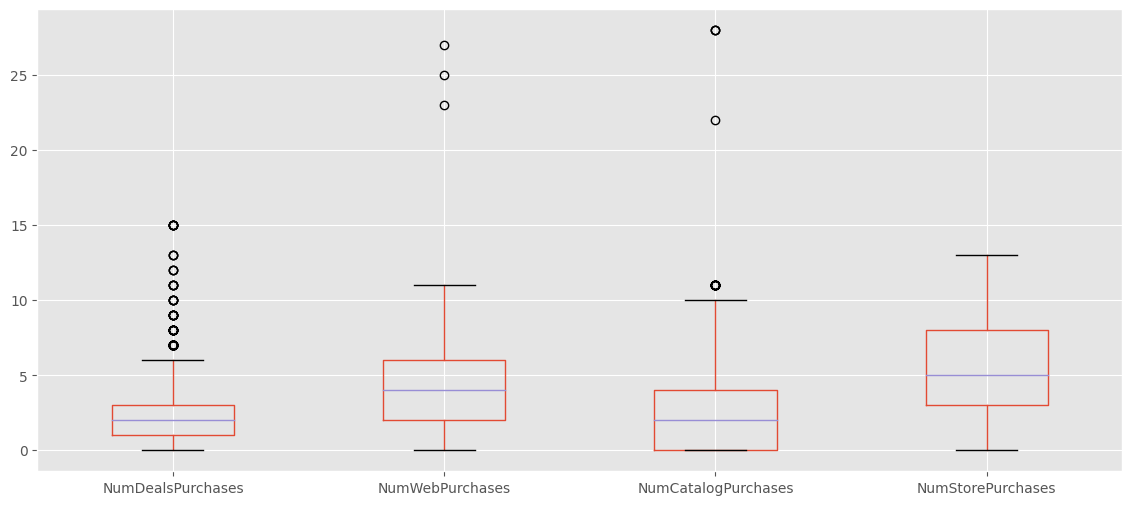

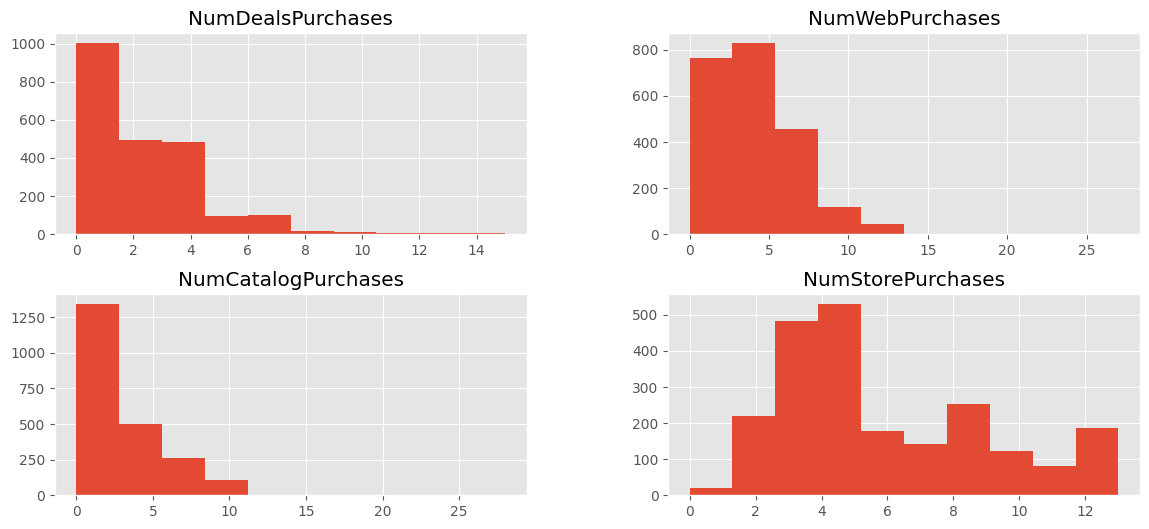

In [328]:
df_compras.boxplot()
df_compras.hist()
plt.show()

Realizo un análisis exploratorio de las columnas de comportamiento de compra para revisar la existencia de outliers mediante la utilización de histogramas de lo cual puedo concluir que la variable 'NumStorePurchases' no cuenta precisamente con valores a los cuales podamos llamar outliers ya que los datos están acotados en rango y a pesar de algunos valores tienen una menor frecuencia no están alejados de la tendencia de los demás valores.  Por este motivo me centraré en las otras tres columnas que si muestran valores que se alejan de los rangos medios de los registros.  Se puede observar también que los registros anómalos se encuentran a la derecha del gráfico lo que significa que son los valores más altos de las columnas.  Usaré como métrica el rango intercuartil para el cálculo de outliers.

In [329]:
q1_deals = np.percentile(df_compras['NumDealsPurchases'], 25)
q3_deals = np.percentile(df_compras['NumDealsPurchases'], 75)
iqr_deals = q3_deals - q1_deals

q1_web = np.percentile(df_compras['NumWebPurchases'], 25)
q3_web = np.percentile(df_compras['NumWebPurchases'], 75)
iqr_web = q3_web - q1_web

q1_catalog = np.percentile(df_compras['NumCatalogPurchases'], 25)
q3_catalog = np.percentile(df_compras['NumCatalogPurchases'], 75)
iqr_catalog = q3_catalog - q1_catalog

iqr_deals, iqr_web, iqr_catalog


(2.0, 4.0, 4.0)

Calcular los valores atípicos

In [330]:
cantidad_registros_totales = sprint6_clientes.shape[0]

atipicos_deals = q3_deals + 1.5 * iqr_deals
df_atipicos_deals = df_compras[df_compras['NumDealsPurchases'] >= atipicos_deals]
cantidad_atipicos_deals = df_atipicos_deals.shape[0]
per_atipicos_deals = cantidad_atipicos_deals / cantidad_registros_totales * 100

atipicos_web = q3_web + 1.5 * iqr_web
df_atipicos_web = df_compras[df_compras['NumWebPurchases'] >= atipicos_web]
cantidad_atipicos_web = df_atipicos_web.shape[0]
per_atipicos_web = cantidad_atipicos_web / cantidad_registros_totales * 100

atipicos_catalog = q3_catalog + 1.5 * iqr_catalog
df_atipicos_catalog = df_compras[df_compras['NumCatalogPurchases'] >= atipicos_catalog]
cantidad_atipicos_catalog = df_atipicos_catalog.shape[0]
per_atipicos_catalog = cantidad_atipicos_catalog / cantidad_registros_totales * 100

print(' VALORES ATÍPICOS '.center(80, '=') + '\n')
print('Nombre Columna '.center(20) + 'Umbral Outliers'.center(20) + 'Cantidad Atípicos'.center(20) + '% de la Muestra'.center(20) + '\n')
print('NumDealsPurchases '.ljust(20) + f'{atipicos_deals}'.center(20) + f'{cantidad_atipicos_deals}'.center(20) + f'{per_atipicos_deals:.2f} %'.center(20))
print('NumWebPurchases '.ljust(20) + f'{atipicos_web}'.center(20) + f'{cantidad_atipicos_web}'.center(20) + f'{per_atipicos_web:.2f} %'.center(20))
print('NumCatalogPurchases '.ljust(20) + f'{atipicos_catalog}'.center(20) +  f'{cantidad_atipicos_catalog}'.center(20) + f'{per_atipicos_catalog:.2f} %'.center(20))
print('\n' + '=' * 82)


=============================== VALORES ATÍPICOS ===============================

  Nombre Columna      Umbral Outliers    Cantidad Atípicos    % de la Muestra   

NumDealsPurchases           6.0                 144                6.50 %       
NumWebPurchases             12.0                 3                 0.14 %       
NumCatalogPurchases         10.0                 70                3.16 %       



In [331]:
indice_atipicos_deals = df_atipicos_deals.index
indice_atipicos_web = df_atipicos_web.index
indice_atipicos_catalog = df_atipicos_catalog.index

print('REGISTROS WEB EN DEALS' + '\n')

contador_web_deals = 0
for i in indice_atipicos_web:
    if i in indice_atipicos_deals:
        print(f'{i} en ambos')
        contador_web_deals += 1
if contador_web_deals == 0:
    print('- No hay registros compartidos entre Web y Deals' + '\n')

print('REGISTROS WEB EN CATALOG' + '\n')

contador_web_catalog = 0
for i in indice_atipicos_web:
    if i in indice_atipicos_catalog:
        print(f'{i} en ambos')
        contador_web_catalog += 1

if contador_web_catalog == 0:
    print('- No hay registros compartidos entre Web y Catalog' + '\n')

print('REGISTROS DEALS IN CATALOG' + '\n')
contador_deals_catalog = 0
for i in indice_atipicos_deals:
    if i in indice_atipicos_catalog:
        print(f'- {i} en ambos')
        contador_deals_catalog += 1

if contador_deals_catalog == 0:
    print('- No hay registros compartidos entre Deals y Catalog' + '\n')


REGISTROS WEB EN DEALS

- No hay registros compartidos entre Web y Deals

REGISTROS WEB EN CATALOG

- No hay registros compartidos entre Web y Catalog

REGISTROS DEALS IN CATALOG

- 20 en ambos
- 153 en ambos
- 614 en ambos
- 674 en ambos


Se realiza análisis para evaluar cual es la manera más conveniente de eliminar los outliers que corresponda al 5 % de la muestra.  Procederá eliminando primero los registros de WebPurchases ya que solo son 3 valores, luego eliminaré los que corresponden a la columna CatalogPurchases y finalmente eliminaré el resto las filas que cumplan la condición de la columna Deals Purchases.

In [332]:
sprint6_clientes.drop(indice_atipicos_web, inplace=True)
sprint6_clientes.drop(indice_atipicos_catalog, inplace=True)

ultimos_indices_eliminar = sprint6_clientes.nlargest(38, 'NumDealsPurchases').index
sprint6_clientes = sprint6_clientes.drop(ultimos_indices_eliminar)

filas_df_sprint_6_filtrado = sprint6_clientes.shape[0]

**Feature Extraction:**

**Usando los datos filtrados reduzca el número de variables. Busque una representación que le permita explicar un 90% de la varianza original de los datos.**

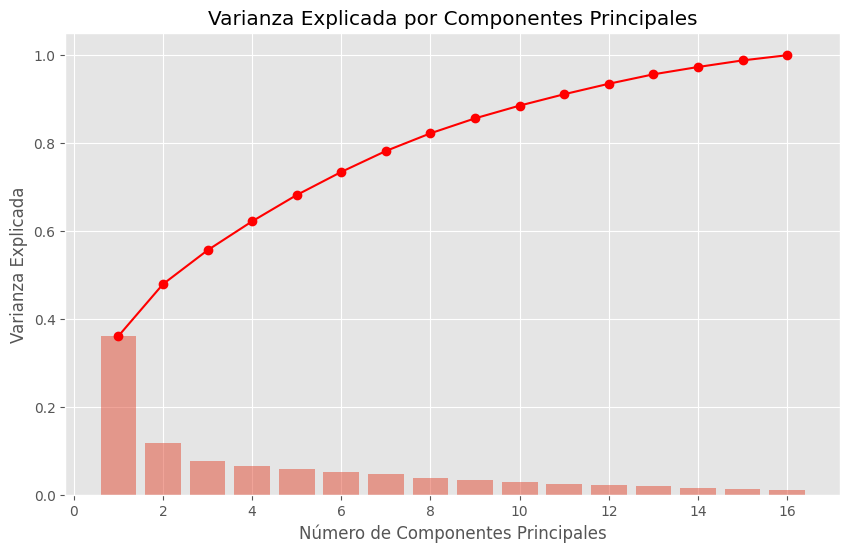

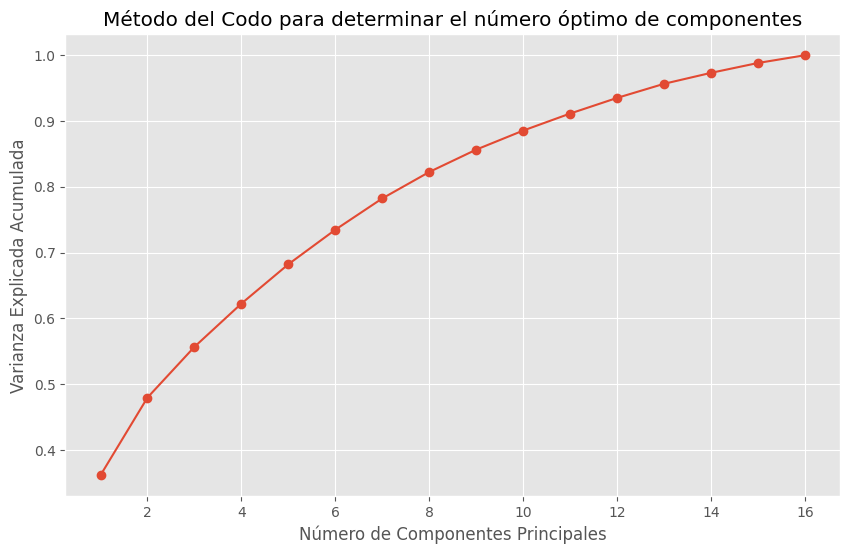

In [333]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalizado = scaler.fit_transform(sprint6_clientes)

pca = PCA()
componentes_principales = pca.fit_transform(df_normalizado)

varianza_explicada = pca.explained_variance_ratio_
componentes = range(1, len(varianza_explicada) + 1)

plt.figure(figsize=(10, 6))
plt.bar(componentes, varianza_explicada, alpha=0.5, align='center')
plt.plot(componentes, varianza_explicada.cumsum(), marker='o', color='r')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True)
plt.show()

# Paso 4: Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(componentes, varianza_explicada.cumsum(), marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Método del Codo para determinar el número óptimo de componentes')
plt.grid(True)
plt.show()



De acuerdo a lo planteado en el ejercicio, para obtener un modelo que nos permita explicar el 90 % de la varianza acumulada al menos debemos considerar 11 primeros componentes principales.  Hay que apreciar, de todas maneras, que en este caso no existen quiebres muy abruptos para el gráfico sino que sigue una curva con crecimiento gradual, en este sentido los componentes principales nunca generan un cambio drástico del rendimiento del modelo como para generar un codo no obstante no deja de ser considerable la reducción de dimensionalidad (5 dimensiones)

## Clustering:

**a) Usando los resultados anteriores clusterice el comportamiento de sus clientes. El área de marketing solicitó que el número de clusters sea no mayor a 8. Encuentre el número óptimo de clusters considerando esa restricción**

**b) Reporte los centroides de cada cluster en términos de las variables originales. Interprete.**

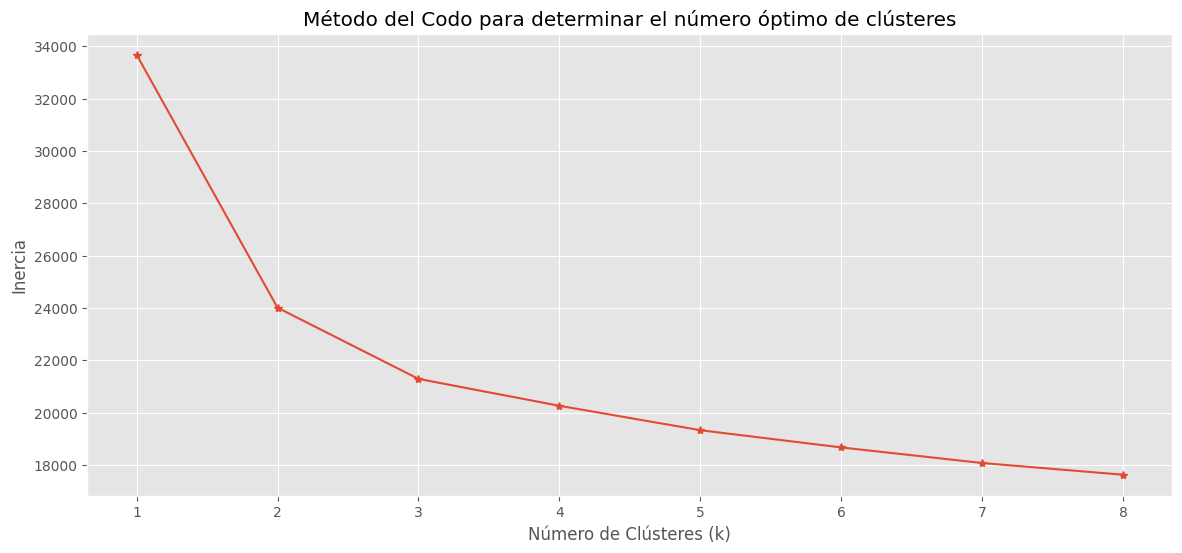

In [337]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

inercia = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_normalizado)
    inercia.append(kmeans.inertia_)

# Paso 3: Graficar la inercia en función del número de clusters
plt.plot(range(1, 9), inercia, marker='*')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clústeres')
plt.show()